**Loading the data**

In [0]:
import numpy as np
import pandas as pd 

df1=pd.read_csv('purchase_history.csv')
df2=pd.read_csv('item_to_id.csv')
df1.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


### Number of trasctions VS total unique customer count

In [0]:
print(df1.shape)
df1['user_id'].nunique()

(39474, 2)


24885

### For second file creating dictionary for mapping purpose

In [0]:
df2.shape
df2.columns
#creating dictionary from data
dict = df2.set_index('Item_id').to_dict()['Item_name']
dict.values()

dict_values(['coffee', 'tea', 'juice', 'soda', 'sandwich loaves', 'dinner rolls', 'tortillas', 'bagels', 'canned vegetables', 'spaghetti sauce', 'ketchup', 'cheeses', 'eggs', 'milk', 'yogurt', 'butter', 'cereals', 'flour', 'sugar', 'pasta', 'waffles', 'frozen vegetables', 'ice cream', 'poultry', 'beef', 'pork', 'bananas', 'berries', 'cherries', 'grapefruit', 'apples', 'broccoli', 'carrots', 'cauliflower', 'cucumbers', 'lettuce', 'laundry detergent', 'dishwashing\xa0', 'paper towels', 'toilet paper', 'aluminum foil', 'sandwich bags', 'shampoo', 'soap', 'hand soap', 'shaving cream', 'baby items', 'pet items'])

## Task 1

**the customer who bought the most items overall in her lifetime**

### Approach

count the no of total items purchase by each customers.

adding a new columns which tell the count of item purchase for that transction.

In [0]:
count_items = []
for i in range(df1.shape[0]):
    count_items.append(len(df1["id"].loc[i].split(",")) )

df1["count_item"]=count_items
df1.head()

,user_id,id,count_item
0,222087,"27,26",2
1,1343649,"6,47,17",3
2,404134,"18,12,23,22,27,43,38,20,35,1",10
3,1110200,"9,23,2,20,26,47,37",7
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...",20


**Using grouping function count the total no of item purchase by each cutomer.**

In [0]:
data = df1[['user_id','count_item']]
user_wise_count=df1.groupby('user_id').sum()
user_wise_count.sort_values(['count_item'], ascending=False).head()

,count_item
user_id,
269335,72
367872,70
397623,64
599172,64
377284,63


## Task 2

for each item, the customer who bought that product the most

### Approach

segregate each item corresposd to cutomers then for each item we can find the the customer who have highest sum .

list of list

In [0]:
item_arr = []
for i in range(df1.shape[0]):
    item_arr.append(df1["id"].loc[i].split(",") )
len(item_arr)
#item_arr

39474

using dictionary converting id to value

In [0]:
final_arr = []
for i in range(len(item_arr)):
    temp_arr = []
    temp_arr = item_arr[i]
    for i in range(len(temp_arr)):
        temp_arr[i]  = dict[int(temp_arr[i])]
    final_arr.append(temp_arr)
 

In [0]:
purchase_user_arr = df1['user_id']
user_to_item =[]
for i in range(len(final_arr)):
    dum = []
    dum = final_arr[i]
    for j in range(len(dum)):
           user_to_item.append([purchase_user_arr[i], dum[j]])

converting each item with userid.

In [0]:
user_item_df = pd.DataFrame(user_to_item, columns=['user_id', 'item_code'])
user_item_df.head(3)
user_item_df['sell']=1
#user_item_df.shape

find the target

for each item we will sum for each custmer and that who will be max will be considered.

In [0]:
item_list = user_item_df['item_code'].unique()

item_fav_customer = []
for item in item_list:
    item_df = user_item_df[user_item_df["item_code"] == item]
    item_fav_customer.append([item, item_df['user_id'].value_counts().idxmax()])

In [0]:
for item in item_fav_customer:
    print (item)

['dishwashing\xa0', 956666]
['spaghetti sauce', 1341188]
['poultry', 334664]
['pork', 1374100]
['beef', 366155]
['laundry detergent', 917199]
['shampoo', 791038]
['tea', 920002]
['frozen vegetables', 1199670]
['coffee', 996380]
['juice', 255546]
['grapefruit', 1433799]
['soap', 1003550]
['sugar', 1301034]
['soda', 397623]
['lettuce', 31625]
['dinner rolls', 364868]
['pasta', 289360]
['waffles', 217277]
['bagels', 820788]
['cheeses', 884172]
['yogurt', 943163]
['milk', 837807]
['broccoli', 297185]
['apples', 1303742]
['cucumbers', 80215]
['berries', 384935]
['sandwich bags', 360336]
['hand soap', 394348]
['butter', 478446]
['cauliflower', 1198106]
['aluminum foil', 143741]
['cereals', 367872]
['cherries', 109578]
['eggs', 172120]
['ketchup', 133355]
['canned vegetables', 238495]
['carrots', 743501]
['bananas', 1218645]
['pet items', 1433188]
['shaving cream', 31625]
['sandwich loaves', 599172]
['flour', 1076958]
['tortillas', 1485538]
['toilet paper', 1425746]
['paper towels', 1077463]


### Task 3

**Cluster items based on user co-purchase history.**

creating the dataframe with customer wise while keeping item as columns

In [0]:
useritem_pivot = user_item_df.pivot_table(index=['user_id'],columns=['item_code'],values='sell')
useritem_pivot.fillna(0, inplace=True)
useritem_pivot.tail(5)
#useritem_pivot.shape

item_code,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1499730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1499778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1499797,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1499817,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1499974,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


for finding realtion among features we have to make corr matrix.

In [0]:
corr = items.corr()
#print(corr)
names=list(corr.index.values)

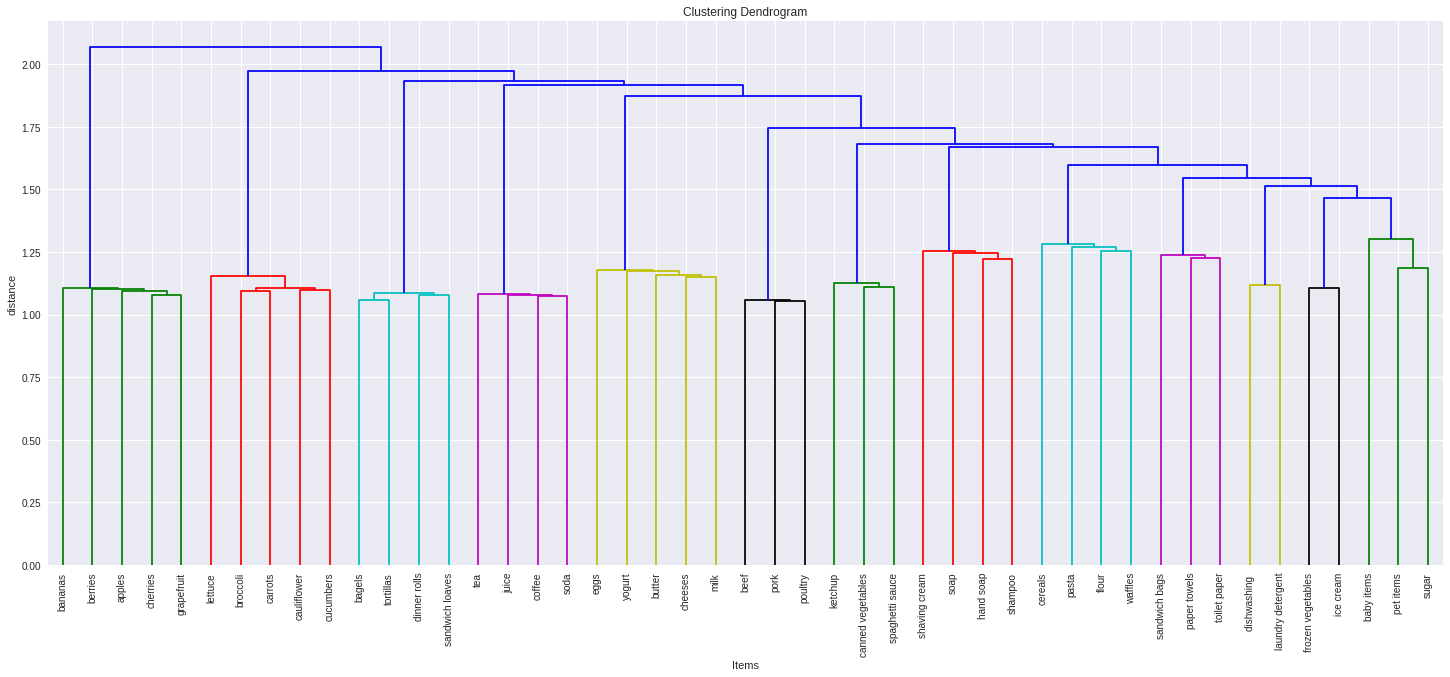

In [0]:
# calculate full dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(corr, 'ward')
max_d = 7              

plt.figure(figsize=(25, 10))
plt.title('Clustering Dendrogram')
plt.xlabel('Items')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=50,                  # changing values of p
    labels=names,
    leaf_rotation=90.,     
    leaf_font_size=10.,     
)

plt.show()
